# Data Viz

## Loading data

In [3]:
import h5py
filename = "challenge_dataset/scan_1.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    #ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array


Keys: <KeysViewHDF5 ['label', 'raw']>
<class 'h5py._hl.dataset.Dataset'>


In [17]:
a_group_key

'label'

In [ ]:
ds_arr.shape

## Viz example

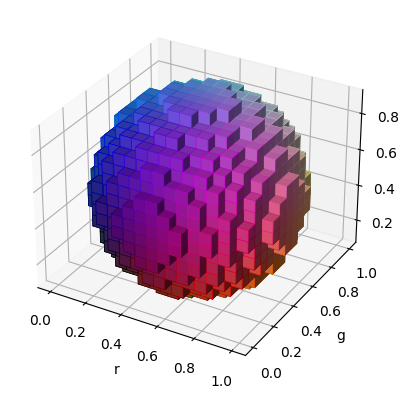

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')

plt.show()

## Scan viz

Visualisation using scan data and also 3D plotter

In [23]:
#! pip install ipympl
#uncomment to enable interactive matplotlib plots

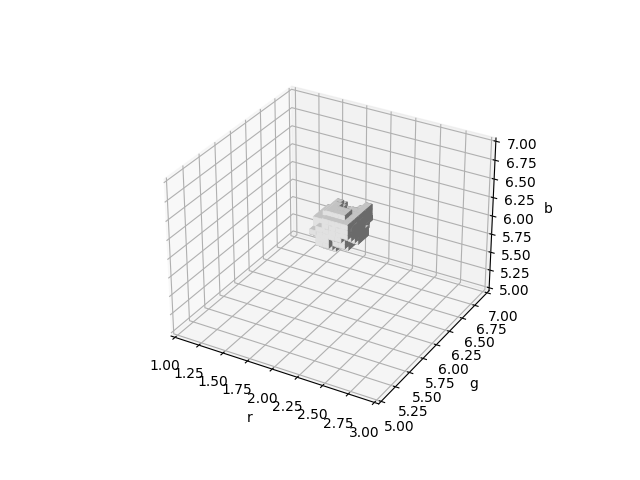

In [28]:
%matplotlib widget

copy_shape = ds_arr.shape

shape = (copy_shape[0] + 1, copy_shape[1] + 1 , copy_shape[2] + 1 )
r, g, b = np.indices(shape) / 16.0

# combine the color components
colors = np.zeros(ds_arr.shape + (3,))
colors[..., 0] = ds_arr
colors[..., 1] = ds_arr
colors[..., 2] = ds_arr

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, ds_arr,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')
ax.axes.set_xlim3d(left=1, right=3) 
ax.axes.set_ylim3d(bottom=5, top=7) 
ax.axes.set_zlim3d(bottom=5, top=7) 


plt.show()